In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import h5py
import json
import pickle
import glob
import itertools
import pandas as pd
# from utils.plot_util import *
import socket
import os

# Loading files

In [2]:
hostname = socket.gethostname()
if hostname == 'HAITI' or 'Gorleben':
    DIR = "C:/Users/xin/OneDrive - bwstaff/xin/trelleborg"
    DATASET = "D:/xin/datasets/Trelleborg/V27/*.h5"
if hostname == 'BALI':
    DIR = "/home/xin/projects/trelleborg"
    DATASET = "/storage/xin/datasets/Trelleborg/V27/*.h5"
if hostname == 'LAPTOP-1FOJITEG':
    DIR = "C:/Users/xinch/OneDrive - bwstaff/xin/trelleborg"
    DATASET = "C:/LINHC/VersucheDBs/Trelleborg/V27/*.h5"
DIR = os.path.abspath(DIR)
DATASET = os.path.abspath(DATASET)

file_list = []
for file in glob.glob(DATASET):
    file_list.append(file)
file_list = sorted(file_list)
file_list_LEM1 = [file for file in file_list if 'LEM1' in file]
file_list_LEM2 = [file for file in file_list if 'LEM2' in file]
file_list_LEM2

['C:\\LINHC\\VersucheDBs\\Trelleborg\\V27\\V27-100bar_LEM2.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\V27\\V27-200bar_LEM2.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\V27\\V27-30bar_LEM2.h5']

In [3]:
def load_and_plot(num,fidx = 20):
    file = file_list_LEM2[num]
    filename = file.split(os.sep)[-1][:-3]
    h51 = h5py.File(file, "r")
    print("file:",filename)
    print("\nATTR:")
    print(h51.attrs.keys())
    print("\nKeys:")
    print(h51.keys())
    
    %matplotlib inline
    plt.figure(figsize=(10,8))
    plt.plot(h51['spd1'],label='speed (negative)')
    plt.plot(h51['ip1k1'],label='intermidiate seal pressure')
    plt.plot(h51['k1t'],label='temperature')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

file: V27-100bar_LEM2

ATTR:
<KeysViewHDF5 ['name_lookup', 'name_rev_lookup']>

Keys:
<KeysViewHDF5 ['S11_LEM2', 'S21_P1_LEM2', 'S21_P2_LEM2', 'S22_LEM2', 'hub1', 'hub2', 'ip1k1', 'ip1k2', 'ip2k1', 'ip2k2', 'k1at', 'k1f', 'k1p', 'k1t', 'k2at', 'k2f', 'k2p', 'k2t', 'phi', 'pos1', 'pos2', 'shub1', 'shub2', 'sk1at', 'sk1f', 'sk1p', 'sk1t', 'sk2at', 'sk2f', 'sk2p', 'sk2t', 'spd1', 'spd2', 'sphi', 'spos1', 'spos2', 'sspd1', 'sspd2', 'stdf', 't', 'tdf']>


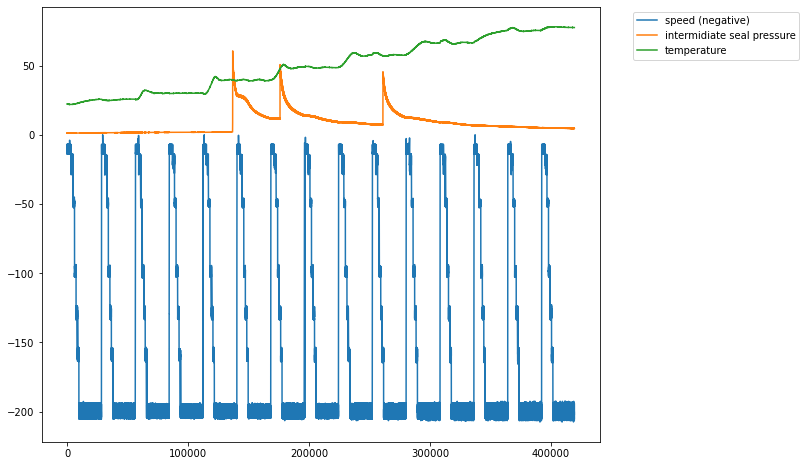

In [4]:
load_and_plot(0)

file: V27-200bar_LEM2

ATTR:
<KeysViewHDF5 ['name_lookup', 'name_rev_lookup']>

Keys:
<KeysViewHDF5 ['S11_LEM2', 'S21_P1_LEM2', 'S21_P2_LEM2', 'S22_LEM2', 'hub1', 'hub2', 'ip1k1', 'ip1k2', 'ip2k1', 'ip2k2', 'k1at', 'k1f', 'k1p', 'k1t', 'k2at', 'k2f', 'k2p', 'k2t', 'phi', 'pos1', 'pos2', 'shub1', 'shub2', 'sk1at', 'sk1f', 'sk1p', 'sk1t', 'sk2at', 'sk2f', 'sk2p', 'sk2t', 'spd1', 'spd2', 'sphi', 'spos1', 'spos2', 'sspd1', 'sspd2', 'stdf', 't', 'tdf']>


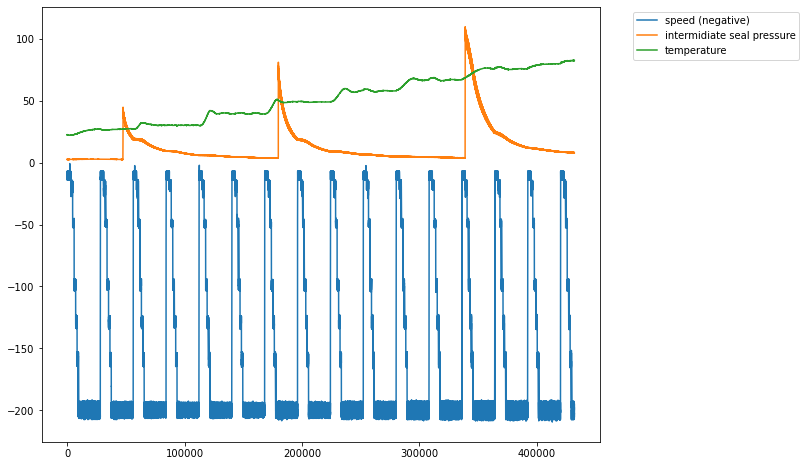

In [5]:
load_and_plot(1)

file: V27-30bar_LEM2

ATTR:
<KeysViewHDF5 ['name_lookup', 'name_rev_lookup']>

Keys:
<KeysViewHDF5 ['S11_LEM2', 'S21_P1_LEM2', 'S21_P2_LEM2', 'S22_LEM2', 'hub1', 'hub2', 'ip1k1', 'ip1k2', 'ip2k1', 'ip2k2', 'k1at', 'k1f', 'k1p', 'k1t', 'k2at', 'k2f', 'k2p', 'k2t', 'phi', 'pos1', 'pos2', 'shub1', 'shub2', 'sk1at', 'sk1f', 'sk1p', 'sk1t', 'sk2at', 'sk2f', 'sk2p', 'sk2t', 'spd1', 'spd2', 'sphi', 'spos1', 'spos2', 'sspd1', 'sspd2', 'stdf', 't', 'tdf']>


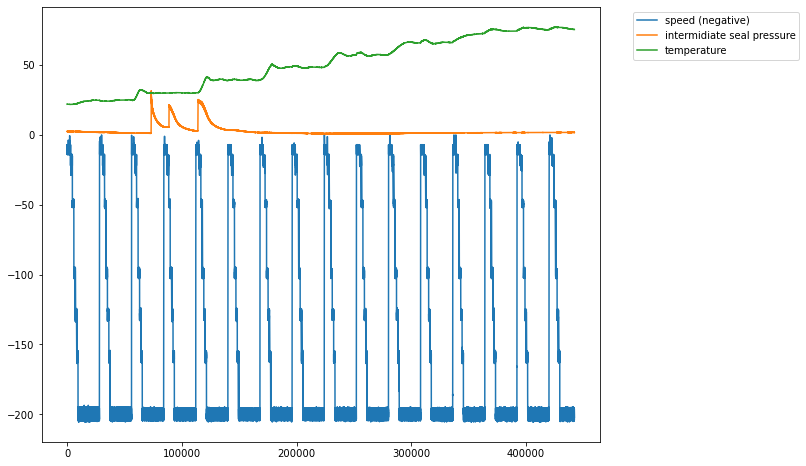

In [6]:
load_and_plot(2)

In [7]:
file = file_list_LEM1[1] # 200 bar as an example
filename = file.split(os.sep)[-1][:-3]

pklName = DIR + '/data/V27/shift_opts_freqs_all/' + filename + '.pkl'
shift_opts_freqs_all = pickle.load(open(pklName, 'rb')) 

h51 = h5py.File(file, "r")
json.loads(h51.attrs["name_lookup"])

{'Ist-Ablauf-Zeit, ca.': 't',
 'Ist-MG1: Teller-Drehfrequenz [Hz]': 'tdf',
 'Soll-MG1: Teller-Drehfrequenz [Hz]': 'stdf',
 'Ist-MG2: Kammer1-Temp[°C]': 'k1t',
 'Soll-MG2: Kammer1-Temp[°C]': 'sk1t',
 'Ist-MG3: Kammer1-Druck[bar]': 'k1p',
 'Soll-MG3: Kammer1-Druck[bar]': 'sk1p',
 'Ist-MG4: Kammer2-Temp.[°C]': 'k2t',
 'Soll-MG4: Kammer2-Temp.[°C]': 'sk2t',
 'Ist-MG5: Kammer2-Druck[bar]': 'k2p',
 'Soll-MG5: Kammer2-Druck[bar]': 'sk2p',
 'Ist-MG6: Kammer1-Kraft[kN]': 'k1f',
 'Soll-MG6: Kammer1-Kraft[kN]': 'sk1f',
 'Ist-MG7: Kammer2-Kraft[kN]': 'k2f',
 'Soll-MG7: Kammer2-Kraft[kN]': 'sk2f',
 'Ist-MG8: Kammer1-Außentemp.[°C]': 'k1at',
 'Soll-MG8: Kammer1-Außentemp.[°C]': 'sk1at',
 'Ist-MG9: Kammer2-Außentemp.[°C]': 'k2at',
 'Soll-MG9: Kammer2-Außentemp.[°C]': 'sk2at',
 'Ist-MG10: Kammer1-Istpos.[mm]': 'pos1',
 'Soll-MG10: Kammer1-Istpos.[mm]': 'spos1',
 'Ist-MG11: Kammer2-Istpos.[mm]': 'pos2',
 'Soll-MG11: Kammer2-Istpos.[mm]': 'spos2',
 'Ist-MG12: Hub1[mm]': 'hub1',
 'Soll-MG12: Hub1[mm]': '

In [8]:
print(filename)
print(shift_opts_freqs_all.shape)

V27-200bar_LEM1
(121, 431930)


## Check


see s21 diff with same pos, spd but different temp and pressure

In [18]:
file_list_LEM2

['C:\\LINHC\\VersucheDBs\\Trelleborg\\V27\\V27-100bar_LEM2.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\V27\\V27-200bar_LEM2.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\V27\\V27-30bar_LEM2.h5']

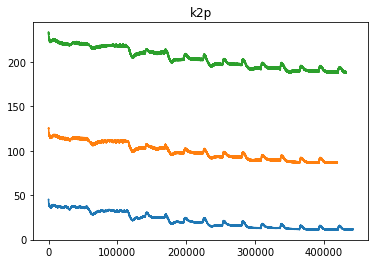

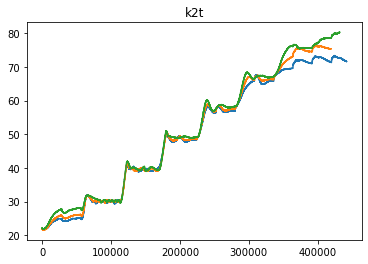

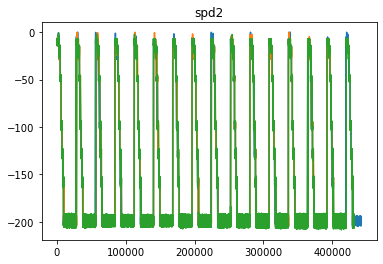

In [19]:
h5_30 = h5py.File(file_list_LEM2[2], "r")
h5_100 = h5py.File(file_list_LEM2[0], "r")
h5_200 = h5py.File(file_list_LEM2[1], "r")

def plot3(h51,h52,h53,key):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(key)
    ax.plot(h51[key])
    ax.plot(h52[key])
    ax.plot(h53[key])
plot3(h5_30,h5_100,h5_200,'k2p')
plot3(h5_30,h5_100,h5_200,'k2t')
plot3(h5_30,h5_100,h5_200,'spd2')

compare B-E and C-F due to similar temperature level

In [20]:
#  compare the data points 1.5e6~3e6 
F = int(1.5*1e5)
L = int(3*1e5)

# extract data
spd_30 = h5_30['spd2'][F:L]
spd_100 = h5_100['spd2'][F:L]
spd_200 = h5_200['spd2'][F:L]
pos_30 = h5_30['pos2'][F:L]
pos_100 = h5_100['pos2'][F:L]
pos_200 = h5_200['pos2'][F:L]

pos_200.shape

(150000,)

In [21]:
# define starting point as the first point of the first lsa
f_30 = np.where(spd_30>-20)[0][0]
f_100 = np.where(spd_100>-20)[0][0]
f_200 = np.where(spd_200>-20)[0][0]

In [22]:
# test N points starting from f_30, f_100 or f_200
N = 10000
pos_30 = pos_30[f_30:f_30+N]
pos_100 = pos_100[f_100:f_100+N]
pos_200 = pos_200[f_200:f_200+N]
spd_30 = spd_30[f_30:f_30+N]
spd_100 = spd_100[f_100:f_100+N]
spd_200 = spd_200[f_200:f_200+N]

pos_30.shape

(10000,)

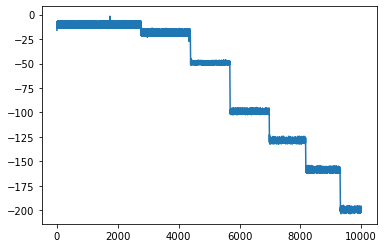

In [23]:
plt.plot(spd_30)

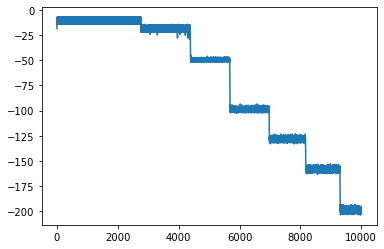

In [24]:
plt.plot(spd_100)

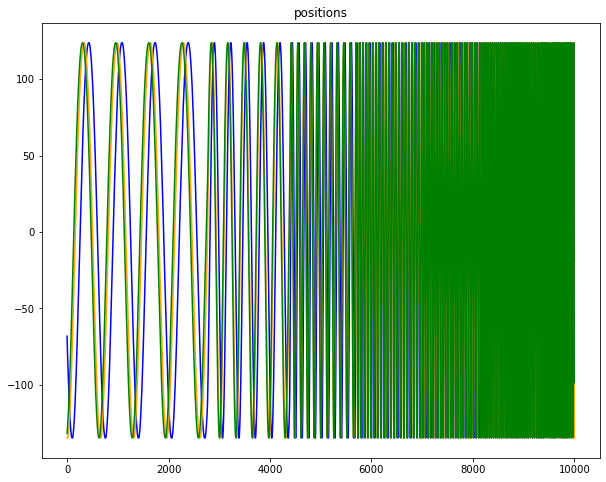

In [25]:
# compare the positions
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('positions')
ax.plot(pos_30,'blue')
ax.plot(pos_100,'orange')
ax.plot(pos_200,'green')

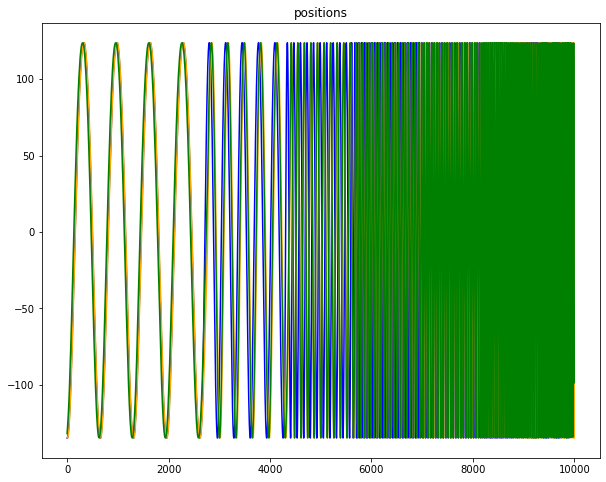

In [26]:
# compare the positions after shift
shfit_p = 100
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('positions')
ax.plot(pos_30[shfit_p:],'blue')
ax.plot(pos_100,'orange')
ax.plot(pos_200,'green')

In [27]:
# Error after shift: big speed error
print("Mean Error of positions in mm:", np.mean(pos_30[shfit_p:] - pos_200[:-shfit_p]))
print("Mean Error of speeds in mm/s:",np.mean(spd_30[shfit_p:] - spd_200[:-shfit_p]))

Mean Error of positions in mm: 0.07064282785098994
Mean Error of speeds in mm/s: -1.9533874857696973


In [28]:
# Error without shift: big position error,because the original extraction is based on speed
# for simplicity, just use the version without shift
# but only compare the first 2000 points
print("Mean Error of positions in mm:", np.mean(pos_30 - pos_200))
print("Mean Error of speeds in mm/s:",np.mean(spd_30 - spd_200))

Mean Error of positions in mm: -1.0387350385663994
Mean Error of speeds in mm/s: -0.03582790442368009


In [29]:
print("Mean Error of positions in mm:", np.mean(pos_100 - pos_200))
print("Mean Error of speeds in mm/s:",np.mean(spd_100 - spd_200))

Mean Error of positions in mm: -0.5306961217536004
Mean Error of speeds in mm/s: -0.051904449612800135


In [30]:
# extract s21, ignore time sync cause only one lsa is extracted
s21_30 = np.array(h5_30['S21_P1_LEM2'][F+f_30:F+f_30+N,:])
s21_100 = np.array(h5_100['S21_P1_LEM2'][F+f_100:F+f_100+N,:])
s21_200 = np.array(h5_200['S21_P1_LEM2'][F+f_200:F+f_200+N,:])
s21_100.shape

(10000, 121)

In [31]:
# as standard
abs(s21_200[:1000,20]).argsort()[-10:][::-1]

array([582, 580, 583, 579, 584, 581, 585, 586, 587, 588], dtype=int64)

In [32]:
abs(s21_30[:1000,20]).argsort()[-10:][::-1]

array([690, 689,  39,  37, 688,  36,  38, 692, 691,  40], dtype=int64)

In [33]:
abs(s21_100[:1000,20]).argsort()[-10:][::-1]

array([606, 608, 603, 605, 607, 604, 610, 609, 602, 611], dtype=int64)

after comparison we can confirm that

shift1 between s21_200 ands 21_30  should be around 24 (=144-120)

shift2 between s21_200s and 21_100 should be around 110 (=473-363)


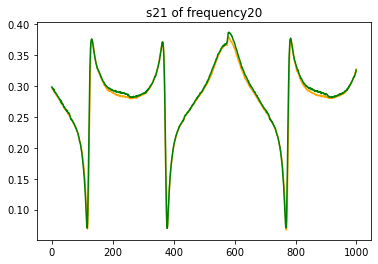

In [34]:
# plot of s21
shift1 = 110
fig = plt.figure()
freq = 20
ax = fig.add_subplot(1, 1, 1)
ax.set_title('s21 of frequency'+str(freq))
ax.plot(abs(s21_30[shift1:1000+shift1,freq]),'orange') # time shift needed
ax.plot(abs(s21_200[:1000,freq]),'green')

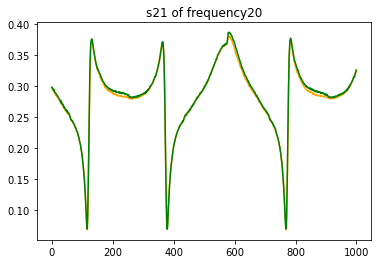

In [35]:
# plot of s21

shift2 = 24
fig = plt.figure()
freq = 20
ax = fig.add_subplot(1, 1, 1)
ax.set_title('s21 of frequency'+str(freq))
ax.plot(abs(s21_100[shift2:1000+shift2,freq]),'orange') # time shift needed
ax.plot(abs(s21_200[:1000,freq]),'green')

In [36]:
NN = 6000

_s21_30 = s21_30[shift1:NN+shift1,:]
_s21_100 = s21_100[shift2:NN+shift2,:]
_s21_200 = s21_200[:NN,:]
_s21_200.shape

(6000, 121)

### Evaluation based on relative error

In [37]:
# result dictionary
d = {
    "abs":[np.mean(abs(_s21_30)),np.mean(abs(_s21_100)),np.mean(abs(_s21_200))],
}
d["mae"] = [abs(np.mean(abs(_s21_30 -_s21_200))),
            abs(np.mean(abs(_s21_100 -_s21_200)))
            ,0]
d["re"] = [d["mae"][0]/d["abs"][2],
           d["mae"][1]/d["abs"][2],
           0]
pd.DataFrame.from_dict(d, orient='index',
                       columns=['30bar', '100bar', '200bar'])

,30bar,100bar,200bar
abs,0.217547,0.217618,0.217612
mae,0.074017,0.064302,0.000000
re,0.340132,0.295488,0.000000


#### Conclusion

Relative Differences betwwen s21s in different pressure:

30 bar vs 200 bar: > 34.01%

100 bar vs 200 bar: > 29.55%

### Evaluation based on MAPE

In [39]:
# real and imag parts of a complex are seperated and even not adjacent!
# but that's enough for the calculation of mae and mape

dataset_p30 = []
for j in range (121):
    dataset_p30.append(_s21_30[:,j].real)
    dataset_p30.append(_s21_30[:,j].imag)
_s21_30_242 = np.array(dataset_p30).T

dataset_p100 = []
for j in range (121):
    dataset_p100.append(_s21_100[:,j].real)
    dataset_p100.append(_s21_100[:,j].imag)
_s21_100_242 = np.array(dataset_p100).T

dataset_p200 = []
for j in range (121):
    dataset_p200.append(_s21_200[:,j].real)
    dataset_p200.append(_s21_200[:,j].imag)
_s21_200_242 = np.array(dataset_p200).T


In [40]:
# Evaluation before autoencoder
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

_s21_200_242= _s21_200_242.flatten()
_s21_100_242= _s21_100_242.flatten()
_s21_30_242= _s21_30_242.flatten()

ind = np.where(np.logical_and(_s21_200_242>=-1e-7, _s21_200_242<=1e-7))[0]
_s21_200_242[ind] = 1e-7 # Prevent division by zero 

d2 = {
    "abs":[np.mean(abs(_s21_30)),np.mean(abs(_s21_100)),np.mean(abs(_s21_200))],
    
    "mae":[
        mean_absolute_error(_s21_200_242,_s21_30_242),
        mean_absolute_error(_s21_200_242,_s21_100_242),
        0
    ],
    
    "mape":[
        mean_absolute_percentage_error(_s21_200_242,_s21_30_242),
        mean_absolute_percentage_error(_s21_200_242,_s21_100_242),
        0
    ]
}

pd.DataFrame.from_dict(d2, orient='index',
                       columns=['30bar', '100bar', '200bar'])

,30bar,100bar,200bar
abs,0.217547,0.217618,0.217612
mae,0.047337,0.041066,0.000000
mape,35.748039,37.520508,0.000000


#### Conclusion

Relative Differences betwwen s21s in different pressure:

30 bar vs 200 bar: >35.75%

100 bar vs 200 bar: >37.52%
